# Assumption


*   As $N \rightarrow \infty$, $P_{real} \rightarrow P_{theoretical}$
*   Mean Reversion



# Configuration

In [47]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [48]:
class point:
    def __init__(self,number = None):
        self.number = number
        self.color = None
        self.parity = None
        
    
    def num2color(self,number):
        if number == None:
            return None
        if 1<=number<=10 or 19<=number<=28:
            color = 'Red' if number % 2 == 1 else 'Black'
        elif 11<=number<=18 or 29<=number<=36:
            color = 'Red' if number % 2 == 0 else 'Black'
        else:
            color = "Green"
        return color
    
    def num2parity(self,number):
        if number == None:
            parity = None
        elif number == 0:
            parity = 'Zero'
        elif number % 2 == 0:
            parity = 'Even'
        elif number % 2 == 1:
            parity = 'Odd'
            
        return parity
    
    def Initialization(self):
        self.color = self.num2color(self.number)
        self.parity = self.num2parity(self.number)

# Data Generating

In [49]:
point_ls = []
N = int(1e6)
for i in range(N):
    point_tmp=point(random.randint(0,36))
    point_tmp.Initialization()
    point_ls.append(point_tmp)

# EDA

## Color Distribution

In [50]:
def count_color(point_ls, idx_start,idx_end):
    red_count = black_count = green_count = 0
    for point in point_ls[idx_start:idx_end]:
        if point.color == 'Red':
            red_count+=1
        elif point.color == 'Black':
            black_count+=1
        elif point.color == 'Green':
            green_count +=1
    return red_count,black_count,green_count

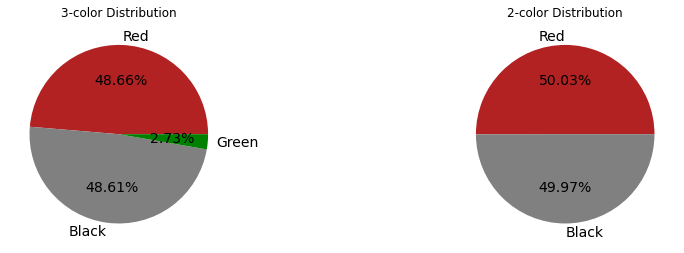

In [51]:
def Color_Distribution(point_ls,start = 0,end = len(point_ls)):
    red_count, black_count, green_count = count_color(point_ls,start,end)
    # Initialise the subplot function using number of rows and columns
    figure, axis = plt.subplots(1,2,figsize=(12,12))
    plt.subplots_adjust(wspace = 1, hspace =0)
    axis[0].pie(np.array([red_count,black_count,green_count]),labels=['Red','Black','Green'],colors = ['firebrick','gray','g'],autopct='%.2f%%', textprops={'fontsize': 14})
    axis[0].set_title("3-color Distribution")
    axis[1].pie(np.array([red_count,black_count]),labels=['Red','Black'],colors = ['firebrick','gray'],autopct='%.2f%%', textprops={'fontsize': 14})
    axis[1].set_title("2-color Distribution")
    plt.show()
    return {'Red_Count': red_count,'Black_Count':black_count,'Green_Count':green_count}
color_count = Color_Distribution(point_ls)

## Color Pattern Detection

In [62]:
def color_pattern_detection(point_ls, N = 100, threshold = 0.6,K=20):
    pattern_ls = [] # stores patterns 
    '''
    1. Randomly pick N consecutive points
    2. screen the pattern with more 70% same color
    '''
    for i in range(100000):
        idx = random.randint(0,len(point_ls)-200)
        red_count, black_count, green_count = count_color(point_ls,idx,idx+N)
        if max(red_count,black_count)/N > threshold:
            pattern_ls.append(point_ls[idx:idx+N+K])
    return pattern_ls

In [63]:
pattern_ls = color_pattern_detection(point_ls)
len(pattern_ls)

1758

In [64]:
def table(pattern_ls,N,K):
    consec_list = []
    for pattern in pattern_ls:
        color_ls_tmp = []
        red_count, black_count, green_count = count_color(pattern,0,N)
        if red_count>black_count:
            color_ls_tmp.append('Red')
        else:
            color_ls_tmp.append('Black')            
        for point in pattern[N:]:
            color_ls_tmp.append(point.color)
        consec_list.append(color_ls_tmp)
    column_names = list(range(K+1))
    df = pd.DataFrame(consec_list, columns=column_names)
    return df

In [65]:
table = table(pattern_ls,100,20)
table

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Black,Red,Red,Black,Green,Red,Red,Black,Black,Red,...,Red,Red,Red,Red,Red,Red,Red,Red,Black,Black
1,Red,Green,Black,Black,Red,Black,Red,Red,Black,Black,...,Red,Black,Red,Black,Red,Black,Red,Black,Black,Red
2,Black,Black,Red,Red,Red,Black,Red,Red,Black,Black,...,Black,Black,Black,Red,Black,Black,Black,Black,Red,Red
3,Black,Red,Red,Black,Black,Red,Black,Red,Red,Red,...,Red,Red,Black,Red,Red,Black,Red,Black,Black,Black
4,Red,Red,Black,Black,Black,Red,Red,Black,Black,Black,...,Red,Red,Red,Black,Black,Red,Black,Red,Red,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,Red,Red,Red,Red,Red,Red,Red,Black,Black,Red,...,Black,Black,Green,Red,Black,Black,Black,Black,Black,Black
1754,Red,Red,Red,Red,Black,Black,Black,Black,Red,Black,...,Black,Black,Black,Red,Black,Black,Black,Red,Red,Black
1755,Red,Black,Red,Red,Black,Red,Black,Red,Black,Red,...,Red,Red,Black,Red,Black,Black,Black,Black,Black,Black
1756,Black,Black,Red,Red,Black,Red,Green,Black,Red,Red,...,Black,Red,Black,Black,Black,Red,Black,Red,Red,Red


In [66]:
# For each {consecutive_same_colors}, display percentage of the other color in vertical axis
import matplotlib.lines as lines
table_tmp = table.copy()
for col in table_tmp.columns.values[1:]:
    table_tmp[col] = ((table_tmp[0]!=table_tmp[col])&(table_tmp[col]!='Green'))*1
display(table_tmp)
table_tmp.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Black,1,1,0,0,1,1,0,0,1,...,1,1,1,1,1,1,1,1,0,0
1,Red,0,1,1,0,1,0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
2,Black,0,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,1
3,Black,1,1,0,0,1,0,1,1,1,...,1,1,0,1,1,0,1,0,0,0
4,Red,0,1,1,1,0,0,1,1,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,Red,0,0,0,0,0,0,1,1,0,...,1,1,0,0,1,1,1,1,1,1
1754,Red,0,0,0,1,1,1,1,0,1,...,1,1,1,0,1,1,1,0,0,1
1755,Red,1,0,0,1,0,1,0,1,0,...,0,0,1,0,1,1,1,1,1,1
1756,Black,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,1,1,1


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000
mean,0.505119,0.480660,0.469852,0.467008,0.482366,0.489761,0.486917,0.514790,0.486348,0.480091,0.477247,0.490899,0.481229,0.491468,0.465301,0.471559,0.483504,0.482366,0.502275,0.494881
std,0.500116,0.499768,0.499232,0.499052,0.499831,0.500037,0.499971,0.499923,0.499956,0.499746,0.499624,0.500059,0.499790,0.500069,0.498936,0.499332,0.499870,0.499831,0.500137,0.500116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
